In [22]:
# Simple CNN model for CIFAR-10
import numpy
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
# Create the model
model = Sequential() #Sequential Neural Network
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Dropout(0.2)) #Dropout layer at 20%
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model.add(Flatten()) #Flatten layer
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 512 units and a rectifier activation function
model.add(Dropout(0.5)) #Dropout layer at 50%
model.add(Dense(num_classes, activation='softmax')) #Fully connected output layer with 10 units and a Softmax activation function, here num_classes value is 10
     
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4194816   
                                                      

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7030 - accuracy: 0.3830 - val_loss: 1.4164 - val_accuracy: 0.4863
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3596 - accuracy: 0.5089 - val_loss: 1.2124 - val_accuracy: 0.5733
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1924 - accuracy: 0.5750 - val_loss: 1.1017 - val_accuracy: 0.6111
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0650 - accuracy: 0.6213 - val_loss: 1.0325 - val_accuracy: 0.6336
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9736 - accuracy: 0.6523 - val_loss: 0.9811 - val_accuracy: 0.6493
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8934 - accuracy: 0.6830 - val_loss: 0.9620 - val_accuracy: 0.6596
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8201 - accuracy: 0.7097 - val_loss: 0.9382 - val_ac

In [3]:
model.save('./model' + '.h5') #Saving the model to .h5

#1. Follow the instruction below and then report how the performance changed.(apply all at once)
Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Flatten layer.
• Dropout layer at 20%.
• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected output layer with 10 units and a Softmax activation function



In [4]:
# Create the model
model1 = Sequential() #Sequential Neural Network
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) #Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) #Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(MaxPooling2D(pool_size=(2, 2))) #Max Pool layer with size 2×2
model1.add(Flatten()) #Flatten layer
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 1024 units and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) #Fully connected layer with 512 units and a rectifier activation function
model1.add(Dropout(0.2)) #Dropout layer at 20%
model1.add(Dense(num_classes, activation='softmax')) #Fully connected output layer with 10 units and a Softmax activation function
     

In [7]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #Compiling
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [28]:
# Fit the model
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3643 - accuracy: 0.8706 - val_loss: 0.6212 - val_accuracy: 0.7932
Epoch 2/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3519 - accuracy: 0.8738 - val_loss: 0.6332 - val_accuracy: 0.7945
Epoch 3/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3387 - accuracy: 0.8793 - val_loss: 0.6245 - val_accuracy: 0.7954
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3315 - accuracy: 0.8834 - val_loss: 0.6246 - val_accuracy: 0.7957
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3245 - accuracy: 0.8827 - val_loss: 0.6264 - val_accuracy: 0.7989
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3158 - accuracy: 0.8866 - val_loss: 0.6330 - val_accuracy: 0.7957
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3054 - accuracy: 0.8924 - val_loss: 0.6225 - val_ac

In [35]:
# Final evaluation of the model
scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 80.58%


#Did the performance change?

In [36]:
print("Accuracy Before adding layers: %.2f%%" % (scores[1]*100))
print("Accuracy after adding layers: %.2f%%" % (scores1[1]*100))
# Calculate the difference in accuracy
accuracy_diff = (scores1[1] - scores[1]) * 100
if accuracy_diff > 0:
    print("The performance improved by %.2f%%" % accuracy_diff)
elif accuracy_diff < 0:
    print("The performance decreased by %.2f%%" % abs(accuracy_diff))
else:
    print("The performance did not change.")

Accuracy Before adding layers: 71.08%
Accuracy after adding layers: 80.58%
The performance improved by 9.50%


#2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly.

In [37]:
import pandas as pd
import numpy as np
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = np.argmax(model.predict(X_test[0:4]), axis=-1)
print(prediction.head())

a  = np.array(y_test[0:4])
print('Actual labels for four images: {0}'.format(np.argmax(a, axis=1)))

1/1 [==============================] - 0s 31ms/step
   ImageId  Label
0        1      3
1        2      1
2        3      8
3        4      0
Actual labels for four images: [3 8 8 0]


#3. Visualize Loss and Accuracy using the history object

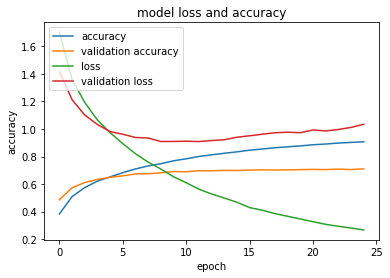

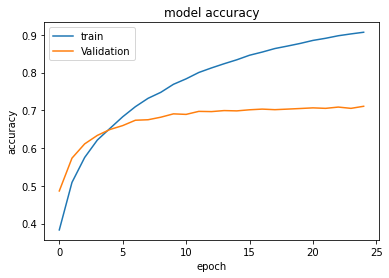

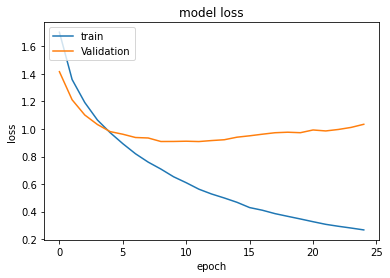

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()